In [1]:
# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import numpy as np
import pyro

from collab2.utils import find_repo_root

root = find_repo_root()
from IPython.display import HTML

from collab2.foraging import random_hungry_followers as rhf
from collab2.foraging import toolkit as ft

logging.basicConfig(format="%(message)s", level=logging.INFO)

# importing packages. See https://github.com/BasisResearch/collab-creatures for repo setup
import logging
import os
import random
import time

import numpy as np
import pyro

from collab2.utils import find_repo_root

root = find_repo_root()
import collab2.foraging.toolkit as ft
from collab2.foraging import random_hungry_followers as rhf
from collab2.foraging.toolkit import animate_predictors, plot_predictor

logging.basicConfig(format="%(message)s", level=logging.INFO)

# users can ignore smoke_test -- it's for automatic testing on GitHub, to make sure the notebook runs on future updates to the repository
smoke_test = "CI" in os.environ
# smoke_test = True
num_frames = 5 if smoke_test else 50
num_svi_iters = 10 if smoke_test else 1000
num_samples = 10 if smoke_test else 1000

notebook_starts = time.time()

In [4]:
random.seed(23)
np.random.seed(23)


follower_sim = rhf.Foragers(
    grid_size=60, num_foragers=3, num_frames=num_frames, num_rewards=30, grab_range=3
)
follower_sim()

follower_sim = rhf.add_follower_foragers(
    follower_sim,
    num_follower_foragers=3,
    visibility_range=6,
    getting_worse=0.5,
    optimal=3,
)

display(follower_sim.foragersDF)

2024-09-17 14:50:31,373 - Generating frame 10/50 
2024-09-17 14:50:31,579 - Generating frame 20/50 
2024-09-17 14:50:31,801 - Generating frame 30/50 
2024-09-17 14:50:32,039 - Generating frame 40/50 


x     y  time  forager      type
0   28.0  28.0     0        0  follower
1   26.0  32.0     1        0  follower
2   26.0  33.0     2        0  follower
3   28.0  36.0     3        0  follower
4   32.0  33.0     4        0  follower
..   ...   ...   ...      ...       ...
45  29.0  36.0    45        2  follower
46  29.0  36.0    46        2  follower
47  32.0  34.0    47        2  follower
48  32.0  32.0    48        2  follower
49  28.0  36.0    49        2  follower

[150 rows x 5 columns]

In [5]:
local_windows_kwargs = {
    "window_size": 10,
    "sampling_fraction": 1,
    "skip_incomplete_frames": False,
}

predictor_kwargs = {
    "proximity": {
        "interaction_length": follower_sim.grid_size / 3,
        "interaction_constraint": None,
        "interaction_constraint_params": {},
        "repulsion_radius": 1.5,
        "optimal_distance": 4,
        "proximity_decay": 1,
    },
    "food": {
        "decay_factor": 0.5,
    },
}

score_kwargs = {
    "nextStep_linear": {"nonlinearity_exponent": 1},
    "nextStep_sublinear": {"nonlinearity_exponent": 0.5},
}

derivedDF_hungry = ft.derive_predictors_and_scores(
    follower_sim,
    local_windows_kwargs,
    predictor_kwargs=predictor_kwargs,
    score_kwargs=score_kwargs,
    dropna=True,
    add_scaled_values=True,
)

display(derivedDF_hungry)

2024-09-17 14:50:56,531 - proximity completed in 0.48 seconds.
2024-09-17 14:50:58,277 - food completed in 1.75 seconds.
2024-09-17 14:50:58,389 - nextStep_linear completed in 0.11 seconds.
2024-09-17 14:50:58,552 - nextStep_sublinear completed in 0.16 seconds.
/home/rafal/s78projects/collab-creatures/collab2/foraging/toolkit/derive.py:56: UserWarning: 
                      Dropped 951/47550 frames from `derivedDF` due to NaN values.
                      Missing values can arise when computations depend on next/previous step positions
                      that are unavailable. See documentation of the corresponding predictor/score generating
                      functions for more information.
                      
  warnings.warn(


x   y  distance_to_forager  time  forager  proximity      food  \
0      18  28            10.000000     0        0   0.000490  0.152670   
1      19  24             9.848858     0        0   0.000122  0.247277   
2      19  25             9.486833     0        0   0.000234  0.269623   
3      19  26             9.219544     0        0   0.000427  0.255454   
4      19  27             9.055385     0        0   0.000739  0.215067   
...    ..  ..                  ...   ...      ...        ...       ...   
47228  41  33             9.055385    48        2   0.010344  0.018173   
47229  41  34             9.219544    48        2   0.009337  0.020560   
47230  41  35             9.486833    48        2   0.007660  0.026136   
47231  41  36             9.848858    48        2   0.005724  0.035060   
47232  42  32            10.000000    48        2   0.003872  0.021436   

       distance_to_next_step  nextStep_linear  nextStep_sublinear  \
0                   8.944272         0.379826            0.212489   
1                  10.630146         0.262932            0.141473   
2                   9.899495         0.313594            0.171503   
3                   9.219544         0.360740            0.200462   
4                   8.602325         0.403536            0.227689   
...                      ...              ...                 ...   
47228              13.341664         0.145887            0.075818   
47229              13.152946         0.157969            0.082377   
47230              13.038405         0.165302            0.086382   
47231              13.000000         0.167760            0.087728   
47232              14.560220         0.067877            0.034535   

       proximity_scaled  food_scaled  nextStep_linear_scaled  \
0              0.500245     0.142989                0.379826   
1              0.500061     0.238677                0.262932   
2              0.500117     0.261279                0.313594   
3              0.500214     0.246948                0.360740   
4              0.500370     0.206099                0.403536   
...                 ...          ...                     ...   
47228          0.505172     0.006956                0.145887   
47229          0.504668     0.009370                0.157969   
47230          0.503830     0.015009                0.165302   
47231          0.502862     0.024036                0.167760   
47232          0.501936     0.010256                0.067877   

       nextStep_sublinear_scaled  
0                       0.212489  
1                       0.141473  
2                       0.171503  
3                       0.200462  
4                       0.227689  
...                          ...  
47228                   0.075818  
47229                   0.082377  
47230                   0.086382  
47231                   0.087728  
47232                   0.034535  

[46599 rows x 14 columns]

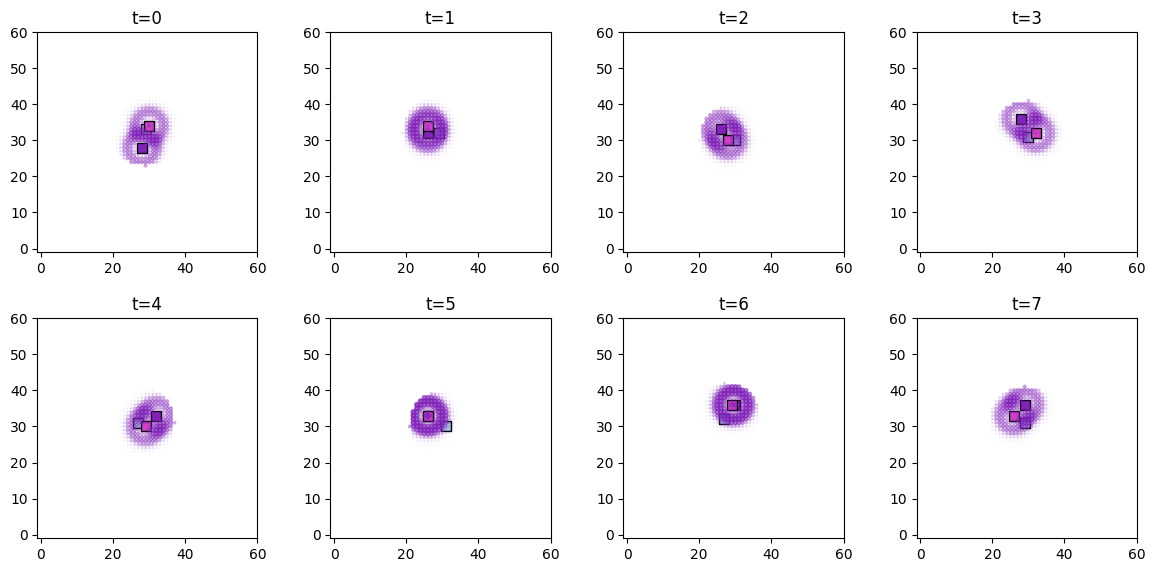

In [7]:
plot_predictor(
    follower_sim.foragers,
    follower_sim.derived_quantities["proximity"],
    predictor_name="proximity",
    time=range(min(8, num_frames)),
    grid_size=60,
    size_multiplier=10,
    random_state=99,
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
)

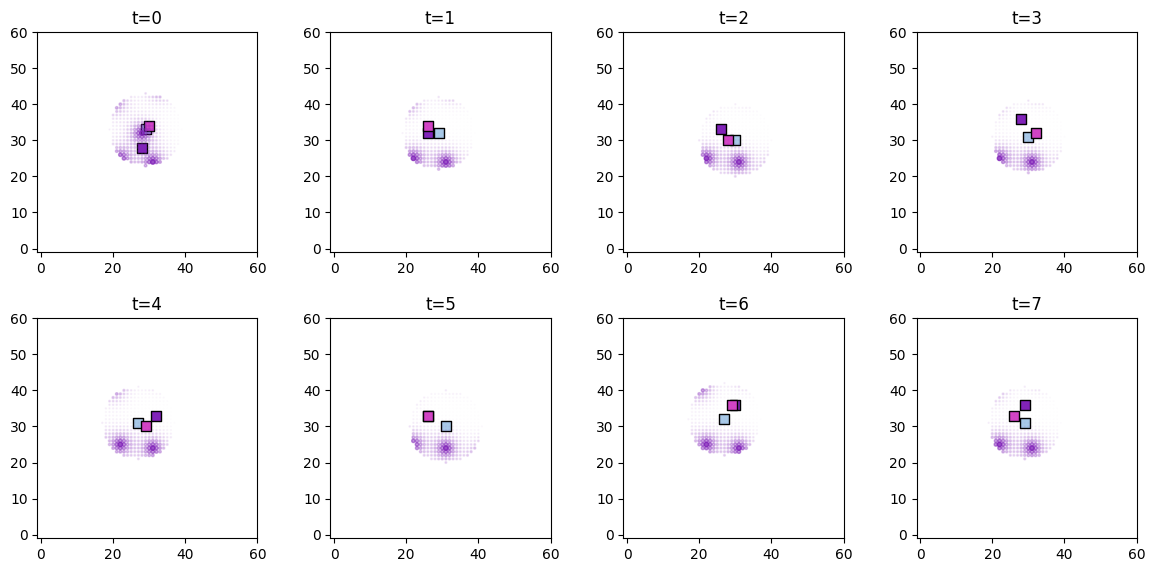

In [8]:
plot_predictor(
    follower_sim.foragers,
    follower_sim.derived_quantities["food"],
    predictor_name="food",
    time=range(min(8, num_frames)),
    grid_size=60,
    size_multiplier=10,
    random_state=99,
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
)

2024-09-17 14:51:51,248 - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


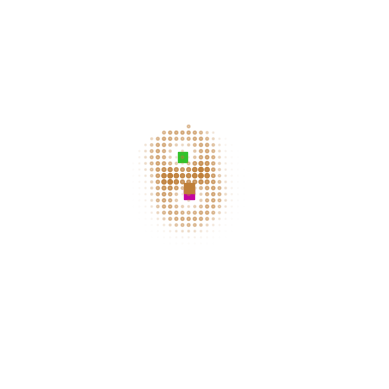

In [9]:
ani = animate_predictors(
    follower_sim.foragersDF,
    follower_sim.derived_quantities["proximity"],
    predictor_name="proximity",
    forager_position_indices=[0, 1, 2],
    forager_predictor_indices=[1],
    grid_size=60,
    random_state=10,
    size_multiplier=10,
)
HTML(ani.to_jshtml())

In [10]:
predictors = ["proximity_scaled", "food_scaled", "distance_to_forager"]
outcome_vars = ["nextStep_linear"]


predictor_tensors_follower, outcome_tensor_follower = ft.prep_data_for_inference(
    follower_sim, predictors, outcome_vars
)

In [12]:
ft.visualise_forager_predictors(
    predictors=[
        predictor_tensors_follower["proximity_scaled"],
        predictor_tensors_follower["food_scaled"],
        predictor_tensors_follower["distance_to_forager"],
    ],
    predictor_names=["proximity_scaled", "food_scaled", "distance_to_forager"],
    outcome_name="hungryep_linear",
    outcome=outcome_tensor_follower["nextStep_linear"],
    sampling_rate=0.5,
)

/home/rafal/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning:

Can't initialize NVML



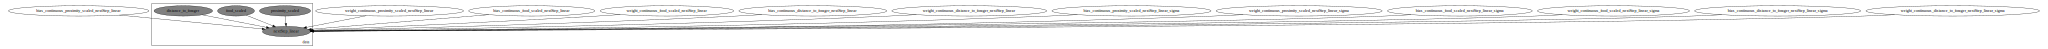

In [13]:
model_sigmavar_follower = ft.HeteroskedasticLinear(
    predictor_tensors_follower, outcome_tensor_follower
)
pyro.render_model(
    model_sigmavar_follower,
    model_args=(predictor_tensors_follower, outcome_tensor_follower),
    render_deterministic=True,
)

2024-09-17 14:55:49,890 - Starting SVI inference with 1500 iterations.


[iteration 0001] loss: 1473754.6250
[iteration 0050] loss: 1357817.0000
[iteration 0100] loss: 1398194.0000
[iteration 0150] loss: 1375105.6250
[iteration 0200] loss: 1347517.5000
[iteration 0250] loss: 1334652.6250
[iteration 0300] loss: 1322221.1250
[iteration 0350] loss: 1461114.7500
[iteration 0400] loss: 1302249.8750
[iteration 0450] loss: 1298488.7500
[iteration 0500] loss: 1302233.3750
[iteration 0550] loss: 1298925.5000
[iteration 0600] loss: 1302051.6250
[iteration 0650] loss: 1305752.1250
[iteration 0700] loss: 1298749.6250
[iteration 0750] loss: 1298113.1250
[iteration 0800] loss: 1297695.6250
[iteration 0850] loss: 1299478.8750
[iteration 0900] loss: 1304434.8750
[iteration 0950] loss: 1297672.3750
[iteration 1000] loss: 1303923.7500
[iteration 1050] loss: 1297363.3750
[iteration 1100] loss: 1297000.3750
[iteration 1150] loss: 1297278.8750
[iteration 1200] loss: 1297931.1250
[iteration 1250] loss: 1301513.8750
[iteration 1300] loss: 1299278.5000
[iteration 1350] loss: 12997

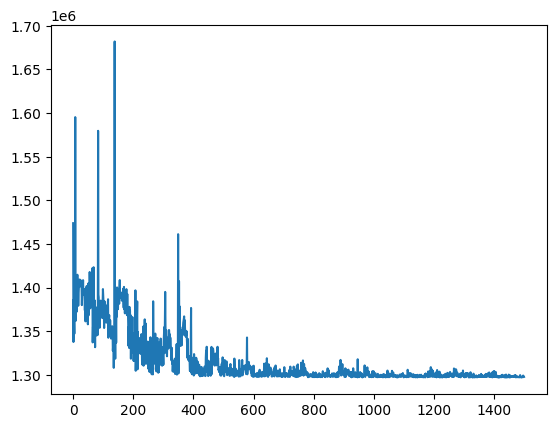

2024-09-17 14:56:13,782 - SVI inference completed in 23.89 seconds.


dict_keys(['bias_continuous_proximity_scaled_nextStep_linear', 'weight_continuous_proximity_scaled_nextStep_linear', 'bias_continuous_food_scaled_nextStep_linear', 'weight_continuous_food_scaled_nextStep_linear', 'bias_continuous_distance_to_forager_nextStep_linear', 'weight_continuous_distance_to_forager_nextStep_linear', 'bias_continuous_proximity_scaled_nextStep_linear_sigma', 'weight_continuous_proximity_scaled_nextStep_linear_sigma', 'bias_continuous_food_scaled_nextStep_linear_sigma', 'weight_continuous_food_scaled_nextStep_linear_sigma', 'bias_continuous_distance_to_forager_nextStep_linear_sigma', 'weight_continuous_distance_to_forager_nextStep_linear_sigma', 'proximity_scaled', 'food_scaled', 'distance_to_forager', 'nextStep_linear'])
['weight_continuous_proximity_scaled_nextStep_linear', 'weight_continuous_food_scaled_nextStep_linear', 'weight_continuous_distance_to_forager_nextStep_linear']
Coefficient marginals:
Site: weight_continuous_proximity_scaled_nextStep_linear
      

In [14]:
results_follower = ft.get_samples(
    model=model_sigmavar_follower,
    predictors=predictor_tensors_follower,
    outcome=outcome_tensor_follower,
    num_svi_iters=1500,
    num_samples=1000,
)

In [16]:
selected_sites = [
    key
    for key in results_follower["samples"].keys()
    if key.startswith("weight") and not key.endswith("sigma")
]
selected_samples = {key: results_follower["samples"][key] for key in selected_sites}

ft.plot_coefs(
    selected_samples, "Follower foragers", nbins=120, ann_start_y=160, ann_break_y=50
)